In [566]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [567]:
assessments = pd.read_csv('assessments.csv')

In [568]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [569]:
courses = pd.read_csv('courses.csv')

In [570]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [571]:
studentRegistration = pd.read_csv('studentRegistration.csv')

In [572]:
studentAssessment = pd.read_csv('studentAssessment.csv')

In [573]:
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


### 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов)

In [574]:
assessments.query("assessment_type == 'Exam'").id_assessment.unique()
# Это список id экзаменов

array([ 1757,  1763, 14990, 15002, 15014, 15025, 24290, 40087, 24299,
       40088, 25340, 25354, 25361, 25368, 30713, 30718, 30723, 34872,
       34885, 34898, 34911, 37424, 37434, 37444], dtype=int64)

#### Студентами, сдавшими только один курс, я буду считать студентов, которые сдавали больше одного экзамена.

In [160]:
e = studentAssessment.query('id_assessment == [1757,  1763, 14990, 15002, 15014, 15025, 24290, 40087, 24299, 40088, 25340, 25354, 25361, 25368, 30713, 30718, 30723, 34872,34885, 34898, 34911, 37424, 37434, 37444]')

In [575]:
e

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
...,...,...,...,...,...
95980,25368,652680,243,0,91.0
95981,25368,652732,249,0,47.0
95982,25368,652965,242,0,87.0
95983,25368,653051,242,0,27.0


In [576]:
grouped = e.groupby('id_student', as_index = False).agg({'id_assessment':'count'}).sort_values('id_assessment')

In [577]:
grouped

,id_student,id_assessment
0,23698,1
3050,626061,1
3051,626103,1
3052,626114,1
3053,626132,1
...,...,...
3388,637691,2
1172,502554,2
3400,640773,2
1149,500006,2


Как можно заметить, студенты сдавали не больше 2-х экзменов, некоторые студенты сдавали лишь один экзамен.

In [578]:
students_with_2_exams = grouped.query('id_assessment == 2') # 326 человек сдавали 2 экзамена

In [579]:
students_with_2_exams

,id_student,id_assessment
166,145640,2
241,189624,2
4571,2639310,2
210,172965,2
4364,2327472,2
...,...,...
3388,637691,2
1172,502554,2
3400,640773,2
1149,500006,2


In [580]:
students_with_2_exams_merged = e.merge(students_with_2_exams, how = 'inner', on = 'id_student')

In [581]:
students_with_2_exams_merged.query('score < 40').sort_values('id_student')

,id_assessment_x,id_student,date_submitted,is_banked,score,id_assessment_y
548,24299,145114,244,0,22.0,2
554,24299,240486,244,0,36.0,2
564,24299,317801,244,0,28.0,2
572,24299,356297,244,0,26.0,2
592,24299,440103,244,0,34.0,2
146,24290,465843,230,0,34.0,2
158,24290,500006,234,0,38.0,2
645,25361,527323,234,0,18.0,2
644,25340,527323,229,0,24.0,2
174,24290,529078,230,0,36.0,2


In [582]:
students_with_2_exams_merged.query('score < 40').sort_values('id_student').id_student.nunique()

31

#### Ответ: если смотреть на студентов, которые сдавали больше одного экзамена, то успешно сдали только один курс 31 студент

### 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*. (5 баллов)

In [583]:
students_with_2_exams_merged.query('score < 40').sort_values('id_student')\
                                                .groupby('id_assessment_x', as_index = False).agg({'id_student':'count'})

,id_assessment_x,id_student
0,24290,11
1,24299,19
2,25340,3
3,25361,1


In [584]:
e

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
52924,24290,559706,234,0,78.0
52925,24290,559770,230,0,54.0
52926,24290,560114,230,0,64.0
52927,24290,560311,234,0,100.0
...,...,...,...,...,...
95980,25368,652680,243,0,91.0
95981,25368,652732,249,0,47.0
95982,25368,652965,242,0,87.0
95983,25368,653051,242,0,27.0


In [585]:
e.id_assessment.unique()
# Всего студенты сдавали 6 экзаменов

array([24290, 24299, 25340, 25354, 25361, 25368], dtype=int64)

In [586]:
student_count = e.groupby('id_assessment', as_index = False).agg({'id_student':'count'})

In [204]:
student_count
# Вот такое получается количество студентов на каждом из экзаменов

,id_assessment,id_student
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524
5,25368,950


In [587]:
failed = e.query('score < 40').sort_values('id_student').groupby('id_assessment', as_index = False)\
                                                    .agg({'id_student':'count'})\
                                                    .rename(columns = {'id_student':'student_count'})

In [588]:
failed
# Это количество студентов, не сдавших тот или иной экзамен

,id_assessment,student_count
0,24290,83
1,24299,149
2,25340,98
3,25354,90
4,25361,39
5,25368,108


In [589]:
second = student_count.merge(failed, on = 'id_assessment')
second

,id_assessment,id_student,student_count
0,24290,747,83
1,24299,1168,149
2,25340,602,98
3,25354,968,90
4,25361,524,39
5,25368,950,108


In [590]:
second['fail_rate'] = second['student_count'] / second['id_student']

In [591]:
second.sort_values('fail_rate')

,id_assessment,id_student,student_count,fail_rate
4,25361,524,39,0.074427
3,25354,968,90,0.092975
0,24290,747,83,0.111111
5,25368,950,108,0.113684
1,24299,1168,149,0.127568
2,25340,602,98,0.162791


Чем выше fail_rate, тем больше студентов не сдали экзамен. Самым высоким fail_rate обладает экзамен 25340, его не сдало 16.28% студентов, а самым низким fail_rate обладает экзамен 25361, его не сдало 7.44% студентов

In [592]:
second['pass_rate'] = 1 - second['fail_rate']

In [593]:
second.sort_values('fail_rate')

,id_assessment,id_student,student_count,fail_rate,pass_rate
4,25361,524,39,0.074427,0.925573
3,25354,968,90,0.092975,0.907025
0,24290,747,83,0.111111,0.888889
5,25368,950,108,0.113684,0.886316
1,24299,1168,149,0.127568,0.872432
2,25340,602,98,0.162791,0.837209


pass_rate - это завершаемость, чем выше завершаемость, тем больше студентов успешно сдали экзамен и окончили курс. Тут ситуация обратная. Самой высокой завершаемостью обладает экзамен с самым низким fail_rate - это экзамен 25361, а самой низкой завершаемостью обладает экзамен 25340.

### 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (5 баллов) 

In [594]:
e.id_assessment.unique()
# Список экзаменов, которые сдавали студенты

array([24290, 24299, 25340, 25354, 25361, 25368], dtype=int64)

In [595]:
e.query('id_student == 558914')

,id_assessment,id_student,date_submitted,is_banked,score
52923,24290,558914,230,0,32.0
70122,25340,558914,230,0,36.0


In [596]:
passed_exams = e.query('score >= 40')
# Так как нас интересуют только успешные прохождения экзамена, 
# то score должен быть больше или равен 40 баллам, что соответствует успешной сдаче экзамена.

In [597]:
passed_exams.groupby('id_assessment', as_index = False).agg({'date_submitted': 'mean'})\
                                                    .rename(columns={'date_submitted': 'mean_date_submitted'})\
                                                    .sort_values('mean_date_submitted')

,id_assessment,mean_date_submitted
2,25340,230.164683
0,24290,231.581325
4,25361,234.936082
3,25354,239.509112
5,25368,242.804038
1,24299,244.404318


Мешьше всего времени было затрачено на экзамен 25340 (в среднем 230 дней), а больше всего на экзамен 24299 (в среднем 244 дня)

### 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)

In [252]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


К сожалению, в колонке date_registration есть пропуски, поэтому считать количество регистраций мы будем по количеству студентов на том или ином предмете.

In [598]:
studentRegistration.groupby('code_module', as_index = False).agg({'id_student':'count'})\
                                                    .rename(columns = {'id_student':'amount_of_registrations'})\
                                                    .sort_values('amount_of_registrations', ascending = False).head(3)

,code_module,amount_of_registrations
1,BBB,7909
5,FFF,7762
3,DDD,6272


**Топ-3 самых популярных предмета: BBB (7909 регистраций), FFF (7762 регистрации), DDD (6272 регистрации)**

Теперь посмотрим на отток студентов. Это колонка date_unregistration.

In [600]:
churned_out = studentRegistration.groupby('code_module', as_index = False).agg({'date_unregistration': 'count'})\
                                                        .rename(columns = {'date_unregistration':'amount_of_churned-out'})

In [601]:
churned_out

,code_module,amount_of_churned-out
0,AAA,126
1,BBB,2377
2,CCC,1947
3,DDD,2235
4,EEE,718
5,FFF,2380
6,GGG,289


In [602]:
registrations = studentRegistration.groupby('code_module', as_index = False).agg({'id_student':'count'})\
                                                    .rename(columns = {'id_student':'amount_of_registrations'})

In [603]:
registrations

,code_module,amount_of_registrations
0,AAA,748
1,BBB,7909
2,CCC,4434
3,DDD,6272
4,EEE,2934
5,FFF,7762
6,GGG,2534


In [604]:
registrations_and_churn = registrations.merge(churned_out, how = 'inner', on = 'code_module')
registrations_and_churn

,code_module,amount_of_registrations,amount_of_churned-out
0,AAA,748,126
1,BBB,7909,2377
2,CCC,4434,1947
3,DDD,6272,2235
4,EEE,2934,718
5,FFF,7762,2380
6,GGG,2534,289


In [605]:
registrations_and_churn['churn_rate'] = registrations_and_churn['amount_of_churned-out'] / registrations_and_churn['amount_of_registrations']

In [606]:
registrations_and_churn.sort_values('churn_rate', ascending = False)

,code_module,amount_of_registrations,amount_of_churned-out,churn_rate
2,CCC,4434,1947,0.439107
3,DDD,6272,2235,0.356346
5,FFF,7762,2380,0.306622
1,BBB,7909,2377,0.300544
4,EEE,2934,718,0.244717
0,AAA,748,126,0.168449
6,GGG,2534,289,0.114049


Самый большой отток наблюдается у предмета CCC (44% не окончивших курс), на втором месте по оттоку предмет DDD, его не окончило 35.6% студентов, на третьем месте FFF, его не окончило около 30.7% студентов.

In [607]:
registrations_and_churn.sort_values('churn_rate', ascending = False).head(3)
# Топ-3 предмета по оттоку студентов

,code_module,amount_of_registrations,amount_of_churned-out,churn_rate
2,CCC,4434,1947,0.439107
3,DDD,6272,2235,0.356346
5,FFF,7762,2380,0.306622


### 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (10 баллов) 

In [298]:

sem_reg = studentRegistration.groupby('code_presentation', as_index = False).agg({'id_student':'count'})\
                                                    .rename(columns = {'id_student':'amount_of_registrations'})\
                                                    .sort_values('amount_of_registrations', ascending = False)
sem_reg

,code_presentation,amount_of_registrations
3,2014J,11260
1,2013J,8845
2,2014B,7804
0,2013B,4684


In [299]:
sem_churned = studentRegistration.groupby('code_presentation', as_index = False).agg({'date_unregistration': 'count'})\
                                                        .rename(columns = {'date_unregistration':'amount_of_churned-out'})
sem_churned

,code_presentation,amount_of_churned-out
0,2013B,1347
1,2013J,2376
2,2014B,2610
3,2014J,3739


In [302]:
sem_reg_and_churned = sem_reg.merge(sem_churned, on = 'code_presentation')
sem_reg_and_churned

,code_presentation,amount_of_registrations,amount_of_churned-out
0,2014J,11260,3739
1,2013J,8845,2376
2,2014B,7804,2610
3,2013B,4684,1347


Завершаемость курса - это retention в данном случае.

In [608]:
sem_reg_and_churned['retention'] = (sem_reg_and_churned['amount_of_registrations'] - sem_reg_and_churned['amount_of_churned-out']) / sem_reg_and_churned['amount_of_registrations']

In [609]:
sem_reg_and_churned.sort_values('retention', ascending = False)

,code_presentation,amount_of_registrations,amount_of_churned-out,retention
1,2013J,8845,2376,0.731374
3,2013B,4684,1347,0.712425
0,2014J,11260,3739,0.667940
2,2014B,7804,2610,0.665556


**Самой низкой завершаемостью курсов обладает семестр 2014B (семестр окончило только 2/3 студентов).**

Для расчета средних сроков сдачи курсов я использую колонку date_submitted из таблицы studentAssessment

In [327]:
studentAssessment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [309]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [314]:
merged_assessments = studentAssessment.merge(assessments[['id_assessment','code_presentation', 'assessment_type']], how = 'inner', on = 'id_assessment')

In [322]:
x = merged_assessments.groupby(['code_presentation', 'assessment_type'], as_index = False).agg({'date_submitted':'mean'})
x

,code_presentation,assessment_type,date_submitted
0,2013B,CMA,128.725592
1,2013B,Exam,230.179402
2,2013B,TMA,88.730973
3,2013J,CMA,151.365559
4,2013J,Exam,239.505165
5,2013J,TMA,95.239238
6,2014B,CMA,132.672305
7,2014B,Exam,232.988985
8,2014B,TMA,91.291990
9,2014J,CMA,140.698595


В таблице выше представлены средние сроки сдачи каждого из элементов контроля в каждом из семестров, для того, чтобы определить семестр с самыми длинными сроками сдачи курсов, я посчитаю среднее всех элементов контроля в каждом семестре.

In [329]:
x.groupby('code_presentation', as_index = False).agg({'date_submitted':'mean'}).sort_values('date_submitted', ascending = False)

,code_presentation,date_submitted
1,2013J,162.036654
3,2014J,160.116417
2,2014B,152.317760
0,2013B,149.211989


**Самые долгие средние сроки сдачи курсов были в семестре 2013J (162 дня с начала семестра).**

### 6. RFM-сегментация студентов (35 баллов)

R - среднее время сдачи экзаменов студентами

In [610]:
recency = studentAssessment.groupby('id_student', as_index = False).agg({'date_submitted':'mean'})\
                                                    .rename(columns={'date_submitted':'recency'})

In [611]:
recency

,id_student,recency
0,6516,111.600000
1,8462,23.000000
2,11391,112.400000
3,23629,55.750000
4,23698,133.444444
...,...,...
23364,2698251,121.428571
23365,2698257,116.200000
23366,2698535,90.375000
23367,2698577,106.200000


F - это завершаемость курсов, то есть сколько курсов завершил студент

In [612]:
studentRegistration
# Завершаемость находится в колонке date_unregistration, где NaN - студент завершил курс, а число, студент не завершил курс

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [613]:
# можно создать отдельную колонку, где True - человек завершил курс, а False - студент не завершил курс
studentRegistration['finished_course'] = studentRegistration['date_unregistration'].isna()

In [614]:
studentRegistration

,code_module,code_presentation,id_student,date_registration,date_unregistration,finished_course
0,AAA,2013J,11391,-159.0,NaN,True
1,AAA,2013J,28400,-53.0,NaN,True
2,AAA,2013J,30268,-92.0,12.0,False
3,AAA,2013J,31604,-52.0,NaN,True
4,AAA,2013J,32885,-176.0,NaN,True
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,True
32589,GGG,2014J,2645731,-23.0,NaN,True
32590,GGG,2014J,2648187,-129.0,NaN,True
32591,GGG,2014J,2679821,-49.0,101.0,False


In [615]:
# И потом сгруппировать данные и посчитать количество завершенных курсов для каждого из студентов
frequency = studentRegistration.groupby('id_student', as_index = False).agg({'finished_course':'sum'})\
                                                        .sort_values('finished_course', ascending = False)\
                                                        .rename(columns = {'finished_course':'frequency'})

In [616]:
frequency

,id_student,frequency
9776,548926,3
10616,556450,3
11207,561208,3
17065,608669,3
8876,537811,3
...,...,...
15631,599232,0
15633,599262,0
15636,599270,0
15653,599382,0


M - это среднее количество баллов студента, полученное за экзамены. Экзаменами в данном случае я буду считать все элементы контроля

In [617]:
monetary = studentAssessment.groupby('id_student', as_index = False).agg({'score':'mean'})\
                                                        .sort_values('score', ascending = False)\
                                                        .rename(columns = {'score':'monetary'})

In [618]:
monetary

,id_student,monetary
17546,645371,100.0
18444,654265,100.0
16244,630286,100.0
19837,687217,100.0
3250,380515,100.0
...,...,...
14191,610738,NaN
17801,648110,NaN
18459,654422,NaN
18926,676642,NaN


In [619]:
RF = recency.merge(frequency, how = 'left', on = 'id_student')
RF

,id_student,recency,frequency
0,6516,111.600000,1
1,8462,23.000000,0
2,11391,112.400000,1
3,23629,55.750000,1
4,23698,133.444444,1
...,...,...,...
23364,2698251,121.428571,1
23365,2698257,116.200000,1
23366,2698535,90.375000,1
23367,2698577,106.200000,1


In [620]:
RFM = RF.merge(monetary, how = 'left', on = 'id_student')
RFM

,id_student,recency,frequency,monetary
0,6516,111.600000,1,61.800000
1,8462,23.000000,0,87.000000
2,11391,112.400000,1,82.000000
3,23629,55.750000,1,82.500000
4,23698,133.444444,1,74.444444
...,...,...,...,...
23364,2698251,121.428571,1,58.142857
23365,2698257,116.200000,1,67.800000
23366,2698535,90.375000,1,39.250000
23367,2698577,106.200000,1,64.400000


Теперь посчитаем квантили для наших столбцов

In [621]:
quintiles = RFM[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 57.5, 0.4: 102.8, 0.6: 115.6, 0.8: 129.5},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 61.857142857142854,
  0.4: 72.18181818181819,
  0.6: 79.45454545454545,
  0.8: 86.0}}

Как можно заметить, у frequency квантили везде равны единице, что означает, что слишком много студентов, которые завершили только один курс, поэтому нет смысла применять метод квантилей для frequency. Вместо этого лучше вручную задать значения. В моем случае будет так: 3 курса - 5, 2 курса - 4, 1 курс - 2, 0 курсов - 1. Тем самым, я поощряю высокой оценкой тех студентов, которые завершили больше одного курса.

In [622]:
# Теперь создадим функции, которые посчитают, к какому квантилю относится каждый студент
# Чем меньше recency (среднее время сдачи экзаменов студентом), тем лучше
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

In [623]:
RFM['R'] = RFM['recency'].apply(lambda x: r_score(x))

In [624]:
RFM

,id_student,recency,frequency,monetary,R
0,6516,111.600000,1,61.800000,3
1,8462,23.000000,0,87.000000,5
2,11391,112.400000,1,82.000000,3
3,23629,55.750000,1,82.500000,5
4,23698,133.444444,1,74.444444,1
...,...,...,...,...,...
23364,2698251,121.428571,1,58.142857,2
23365,2698257,116.200000,1,67.800000,2
23366,2698535,90.375000,1,39.250000,4
23367,2698577,106.200000,1,64.400000,3


In [625]:
def f_score(x):
    if x >= 3:
        return 5
    elif x == 2:
        return 4
    elif x == 1:
        return 2
    elif x == 0:
        return 1

In [626]:
RFM['F'] = RFM['frequency'].apply(lambda x: f_score(x))
RFM

,id_student,recency,frequency,monetary,R,F
0,6516,111.600000,1,61.800000,3,2
1,8462,23.000000,0,87.000000,5,1
2,11391,112.400000,1,82.000000,3,2
3,23629,55.750000,1,82.500000,5,2
4,23698,133.444444,1,74.444444,1,2
...,...,...,...,...,...,...
23364,2698251,121.428571,1,58.142857,2,2
23365,2698257,116.200000,1,67.800000,2,2
23366,2698535,90.375000,1,39.250000,4,2
23367,2698577,106.200000,1,64.400000,3,2


In [627]:
def m_score(x):
    if x <= quintiles['monetary'][.2]:
        return 1
    elif x <= quintiles['monetary'][.4]:
        return 2
    elif x <= quintiles['monetary'][.6]:
        return 3
    elif x <= quintiles['monetary'][.8]:
        return 4
    else:
        return 5

In [628]:
RFM['M'] = RFM['monetary'].apply(lambda x: m_score(x))
RFM

,id_student,recency,frequency,monetary,R,F,M
0,6516,111.600000,1,61.800000,3,2,1
1,8462,23.000000,0,87.000000,5,1,5
2,11391,112.400000,1,82.000000,3,2,4
3,23629,55.750000,1,82.500000,5,2,4
4,23698,133.444444,1,74.444444,1,2,3
...,...,...,...,...,...,...,...
23364,2698251,121.428571,1,58.142857,2,2,1
23365,2698257,116.200000,1,67.800000,2,2,2
23366,2698535,90.375000,1,39.250000,4,2,1
23367,2698577,106.200000,1,64.400000,3,2,2


In [629]:
# Теперь сконкатенируем значения полученных столбцов
RFM['RFM_Score'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM

,id_student,recency,frequency,monetary,R,F,M,RFM_Score
0,6516,111.600000,1,61.800000,3,2,1,321
1,8462,23.000000,0,87.000000,5,1,5,515
2,11391,112.400000,1,82.000000,3,2,4,324
3,23629,55.750000,1,82.500000,5,2,4,524
4,23698,133.444444,1,74.444444,1,2,3,123
...,...,...,...,...,...,...,...,...
23364,2698251,121.428571,1,58.142857,2,2,1,221
23365,2698257,116.200000,1,67.800000,2,2,2,222
23366,2698535,90.375000,1,39.250000,4,2,1,421
23367,2698577,106.200000,1,64.400000,3,2,2,322


Далее я предлагаю собственную сегментацию студентов на основании их RFM-score.

**чемпионы** - [4-5]5[3-5] - закончили 3 курса на высокие оценки с высокой скоростью сдачи, скорее всего купят наши новые курсы

**лояльные** - [1-5]5[1-5] - закончили три курса с любой скоростью и с любыми оценками, скорее всего купят наш новый курс

**потенциально лояльные** - [4-5][2-4][4-5] - закончили один-два курса на высокие оценки с хорошим временем сдачи, с большой вероятностью купят наши новые курсы, но надо их дополнительно замотивировать на прохождение

**требуют внимания** - [1-3][2-4][1-3] - закончили один-два курса со средним временем сдачи и оценками средними или ниже, могут купить новый курс, если как-то замотивировать их

**на грани** - [1-3]2[1-5] - закончили один курс со средним или ниже временем сдачи, также можно работать с такими студентами, пытаясь привлечь их внимание к нашей продукции

**незаинтересованные** - [1-2]1[1-5] - те, кто не закончил ни один курс, но особо и не были заинтересованы в его прохождении

**потерявшие интерес** - [3-5]1[1-5] - те, кто начал неплохо, но позже потерял интерес и удалился с курса

**слабо мотивированные** - [1-3][2-4][1-5] - закончили один-два курса с низким временем сдачи экзаменов

**быстрее всех** - [4-5][2-4][1-5] - быстро сдали все экзамены на любые оценки, при этом закончили хотя бы один курс (нам могут быть полезны тем, что они могут затем купить еще курс






In [630]:
segt_map = {
    r'[4-5]5[3-5]': 'чемпионы',
    r'[1-5]5[1-5]': "лояльные",
    r'[4-5][2-4][4-5]': 'потенциально лояльные',
    r'[1-3][2-4][1-3]': 'требуют внимания',
    r'[1-3]2[1-5]': 'на грани',
    r'[1-2]1[1-5]': 'незаинтересованные',
    r'[3-5]1[1-5]': 'потерявшие интерес',
    r'[4-5][2-4][1-5]': 'быстрее всех',
    r'[1-3][2-4][1-5]': 'слабо мотивированные'  
}

RFM['Segment'] = RFM['R'].map(str) + RFM['F'].map(str) + RFM['M'].map(str)
RFM['Segment'] = RFM['Segment'].replace(segt_map, regex=True)
RFM.head(10)

,id_student,recency,frequency,monetary,R,F,M,RFM_Score,Segment
0,6516,111.600000,1,61.800000,3,2,1,321,требуют внимания
1,8462,23.000000,0,87.000000,5,1,5,515,потерявшие интерес
2,11391,112.400000,1,82.000000,3,2,4,324,на грани
3,23629,55.750000,1,82.500000,5,2,4,524,потенциально лояльные
4,23698,133.444444,1,74.444444,1,2,3,123,требуют внимания
5,23798,120.454545,1,93.909091,2,2,5,225,на грани
6,24186,160.625000,1,62.500000,1,2,2,122,требуют внимания
7,24213,125.714286,1,76.285714,2,2,3,223,требуют внимания
8,24391,152.777778,1,88.888889,1,2,5,125,на грани
9,24734,121.600000,1,46.800000,2,2,1,221,требуют внимания


In [631]:
RFM.Segment.value_counts()

требуют внимания         7617
на грани                 5814
быстрее всех             3912
потерявшие интерес       3337
потенциально лояльные    2167
слабо мотивированные      463
незаинтересованные         52
лояльные                    7
Name: Segment, dtype: int64

In [632]:
RFM.R.value_counts()

5    4680
2    4680
3    4671
4    4671
1    4667
Name: R, dtype: int64

In [633]:
RFM.F.value_counts()

2    18699
1     3389
4     1274
5        7
Name: F, dtype: int64

In [634]:
RFM.M.value_counts()

4    4703
1    4672
2    4672
3    4668
5    4654
Name: M, dtype: int64

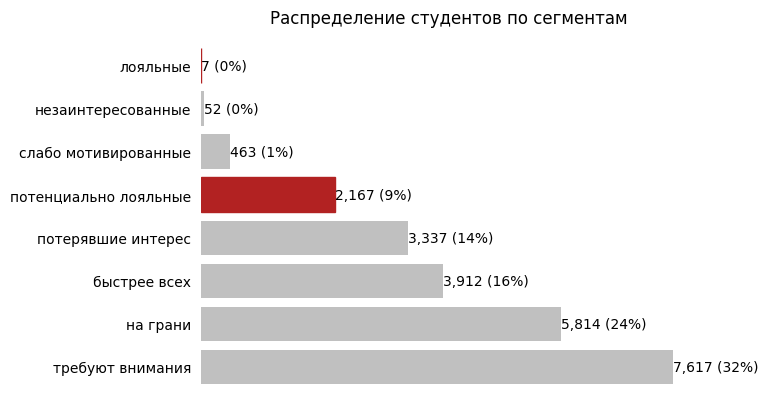

In [635]:
segments_counts = RFM['Segment'].value_counts().sort_values(ascending=False)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)
ax.set_title('Распределение студентов по сегментам')

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['чемпионы', 'лояльные', 'потенциально лояльные']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

В качестве core-аудитории я выделил чемпионов, лояльных и потенциально лояльных (они выделены красным). Мне кажется, что с такими людьми будет наиболее просто работать, поскольку они все в этой или иной мере лояльны нашей образовательной платформе, их стоит вознаграждать за преданность нашей образовательной платформе, предлагать уникальные продукты и условия. Однако, как можно заметить, чемпионов у нас нет, то есть нет людей, которые закончили 3 курса на высокие оценки с высокой скоростью. Можно сказать, что наша core-аудитория составляет около 10%, с остальными людьми надо усиленно работать, особенно, если они относятся к сегментам требуют внимания, на грани и быстрее всех (таких людей 72%), поскольку люди из этих сегментов прошли один-два курса и имеют либо неплохую скорость прохождения, либо неплохие оценки за курс, что может говорить об их заинтересованности в прохождении курса, и, как следствие, можно попытаться привлечь таких клиентов к нашим другим образовательным продуктам. Также у нас довольно много студентов, потерявших интерес (14%), с ними стоит работать с той стороны, чтобы попытаться вернуть интерес к нашей образовательной платформе.